In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_rbk_strategy import (
    TSMyoRBKStrategy,
)
from datetime import datetime

In [2]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2020, 8, 26),
    rate=0.25/10000,
    slippage=0.6,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
#engine.add_strategy(TSMyoRBKStrategy, {'limited_size':8,'fixed_size': 1,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_stop':0.55})
engine.add_strategy(TSMyoRBKStrategy, {'limited_size':8,'fixed_size': 1,'atr_stop': 5, 'atr_window': 70, 'atr_ma_len': 25, 'trailing_stop':0.6})

2020-08-27 00:06:55.107016	开始加载历史数据
2020-08-27 00:06:55.108008	加载进度： [1%]
2020-08-27 00:06:55.109010	加载进度： [3%]
2020-08-27 00:06:55.109010	加载进度： [4%]
2020-08-27 00:06:55.256660	加载进度： [6%]
2020-08-27 00:06:55.554456	加载进度： [7%]
2020-08-27 00:06:55.902759	加载进度： [9%]
2020-08-27 00:06:56.232059	加载进度：# [10%]
2020-08-27 00:06:56.619411	加载进度：# [12%]
2020-08-27 00:06:56.891164	加载进度：# [13%]
2020-08-27 00:06:57.149398	加载进度：# [15%]
2020-08-27 00:06:57.538763	加载进度：# [16%]
2020-08-27 00:06:57.848541	加载进度：# [17%]
2020-08-27 00:06:58.199861	加载进度：# [19%]
2020-08-27 00:06:58.431578	加载进度：## [20%]
2020-08-27 00:06:58.735854	加载进度：## [22%]
2020-08-27 00:06:58.993088	加载进度：## [23%]
2020-08-27 00:06:59.365426	加载进度：## [25%]
2020-08-27 00:06:59.632174	加载进度：## [26%]
2020-08-27 00:06:59.914431	加载进度：## [28%]
2020-08-27 00:07:00.304292	加载进度：## [29%]
2020-08-27 00:07:00.571535	加载进度：### [31%]
2020-08-27 00:07:00.802745	加载进度：### [32%]
2020-08-27 00:07:01.070496	加载进度：### [33%]
2020-08-27 00:07:01.473863	加载进度：### [35%]
2

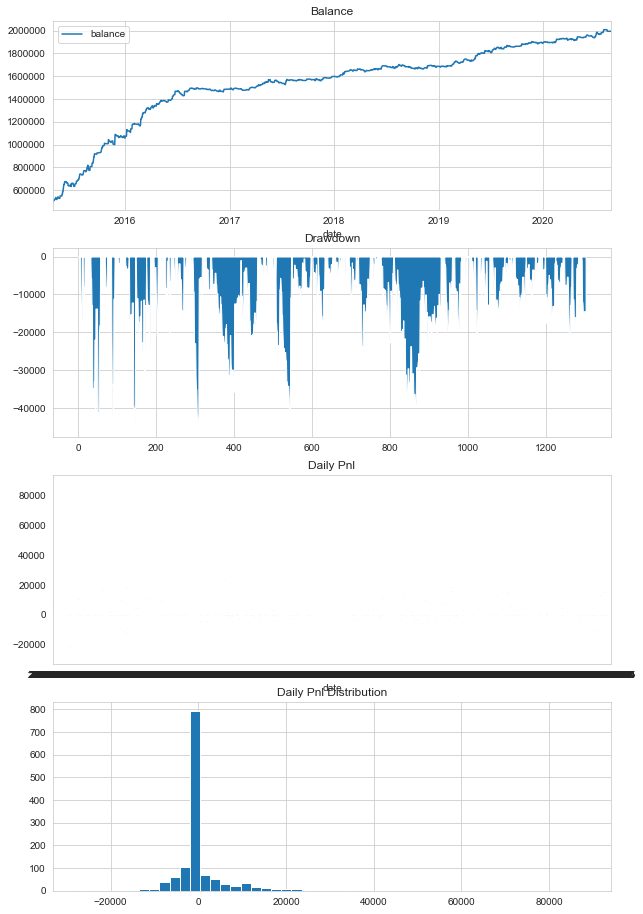

In [3]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [4]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("atr_stop", 4, 5, 1) # 4
#setting.add_parameter("trailing_stop", 0.4, 0.6, 0.05) # 0.55
setting.add_parameter("atr_window", 50, 80, 5) # 44
setting.add_parameter("atr_ma_len", 20, 40, 5) # 22

op_re = engine.run_optimization(setting)
engine.calc_pbo(op_re, 10)

2020-03-17 23:49:48.410898	参数：{'atr_stop': 5, 'atr_window': 70, 'atr_ma_len': 25}, 目标：1.9007809925630634
2020-03-17 23:49:48.411898	参数：{'atr_stop': 5, 'atr_window': 65, 'atr_ma_len': 25}, 目标：1.877679233876815
2020-03-17 23:49:48.411898	参数：{'atr_stop': 5, 'atr_window': 60, 'atr_ma_len': 25}, 目标：1.859562342273657
2020-03-17 23:49:48.411898	参数：{'atr_stop': 5, 'atr_window': 55, 'atr_ma_len': 25}, 目标：1.8525271791925153
2020-03-17 23:49:48.411898	参数：{'atr_stop': 5, 'atr_window': 75, 'atr_ma_len': 35}, 目标：1.8469452415066054
2020-03-17 23:49:48.411898	参数：{'atr_stop': 5, 'atr_window': 70, 'atr_ma_len': 35}, 目标：1.846270188567812
2020-03-17 23:49:48.411898	参数：{'atr_stop': 5, 'atr_window': 80, 'atr_ma_len': 25}, 目标：1.8354822638645492
2020-03-17 23:49:48.411898	参数：{'atr_stop': 5, 'atr_window': 70, 'atr_ma_len': 30}, 目标：1.822095886377864
2020-03-17 23:49:48.411898	参数：{'atr_stop': 5, 'atr_window': 75, 'atr_ma_len': 20}, 目标：1.821550474064922
2020-03-17 23:49:48.411898	参数：{'atr_stop': 5, 'atr_window': 

样本内组合为(0, 1, 2, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6571428571428571
样本内组合为(0, 1, 2, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6571428571428571
样本内组合为(0, 1, 2, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6142857142857143
样本内组合为(0, 1, 2, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8714285714285714
样本内组合为(0, 1, 2, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9
样本内组合为(0, 1, 2, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9
样本内组合为(0, 1, 2, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7857142857142857
样本内组合为(0, 1, 2, 7, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7857142857142857
样本内组合为(0, 1, 2, 8, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9
样本内组合为(0, 1, 3, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6142857142857143
样本内组合为(0, 1, 3, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.9
样本内组合为(0, 1, 3, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.7428571428571429
样本内组合为(0, 1, 3, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.8285714285714286
样本内组合为(0, 1, 3, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0

样本内组合为(1, 2, 3, 4, 5)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6142857142857143
样本内组合为(1, 2, 3, 4, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5857142857142857
样本内组合为(1, 2, 3, 4, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6
样本内组合为(1, 2, 3, 4, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5714285714285714
样本内组合为(1, 2, 3, 4, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6
样本内组合为(1, 2, 3, 5, 6)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6714285714285714
样本内组合为(1, 2, 3, 5, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5857142857142857
样本内组合为(1, 2, 3, 5, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6142857142857143
样本内组合为(1, 2, 3, 5, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6428571428571429
样本内组合为(1, 2, 3, 6, 7)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6142857142857143
样本内组合为(1, 2, 3, 6, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5857142857142857
样本内组合为(1, 2, 3, 6, 9)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.6714285714285714
样本内组合为(1, 2, 3, 7, 8)时，样本内最优参数在样本外相对排名 W （0,1）越大说明在样本外越优秀：0.5857142857142857
样本内组合为(1, 2, 3, 7, 9)时，样本内最优参

0.047619047619047616

2020-08-27 00:09:39.276972	开始加载历史数据
2020-08-27 00:09:39.534716	加载进度： [2%]
2020-08-27 00:09:39.745905	加载进度： [4%]
2020-08-27 00:09:40.051183	加载进度： [5%]
2020-08-27 00:09:40.352457	加载进度： [7%]
2020-08-27 00:09:40.621803	加载进度： [9%]
2020-08-27 00:09:40.887044	加载进度：# [11%]
2020-08-27 00:09:41.182313	加载进度：# [12%]
2020-08-27 00:09:41.462567	加载进度：# [14%]
2020-08-27 00:09:41.714797	加载进度：# [16%]
2020-08-27 00:09:41.941508	加载进度：# [18%]
2020-08-27 00:09:42.236778	加载进度：# [19%]
2020-08-27 00:09:42.507534	加载进度：## [21%]
2020-08-27 00:09:43.231696	加载进度：## [23%]
2020-08-27 00:09:43.461905	加载进度：## [25%]
2020-08-27 00:09:43.744163	加载进度：## [26%]
2020-08-27 00:09:44.000395	加载进度：## [28%]
2020-08-27 00:09:44.283655	加载进度：### [30%]
2020-08-27 00:09:44.554902	加载进度：### [32%]
2020-08-27 00:09:44.838157	加载进度：### [34%]
2020-08-27 00:09:45.152444	加载进度：### [35%]
2020-08-27 00:09:45.452719	加载进度：### [37%]
2020-08-27 00:09:45.682433	加载进度：### [39%]
2020-08-27 00:09:45.979703	加载进度：#### [41%]
2020-08-27 00:09:46.291729	加载进度：##

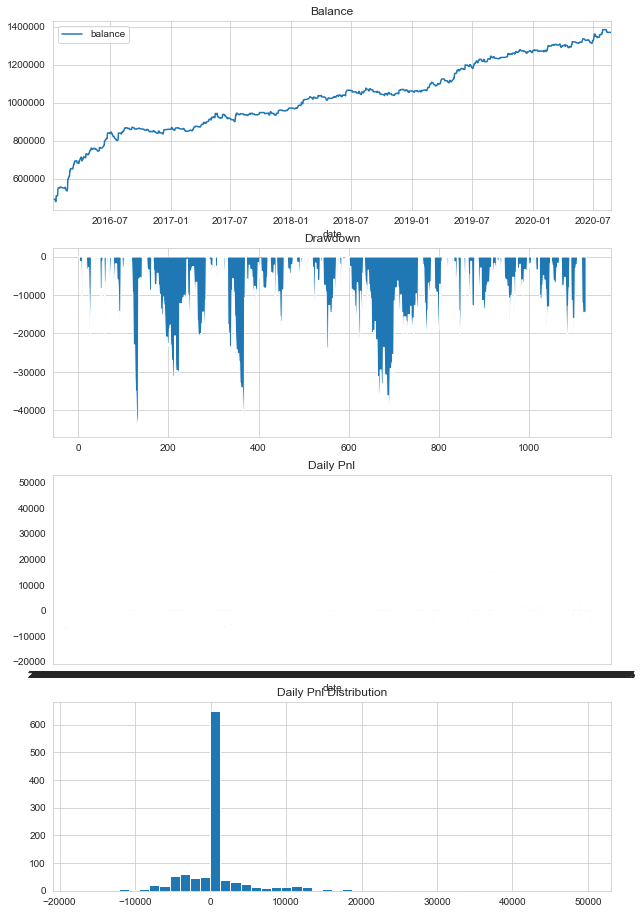

In [4]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2016, 1, 1),
    end=datetime(2020, 8, 26),
    rate=0.23/10000,
    slippage=0.6,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 5, 'atr_window': 70, 'atr_ma_len': 25, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2020-08-27 00:12:08.958191	开始加载历史数据
2020-08-27 00:12:09.854526	加载进度： [2%]
2020-08-27 00:12:10.118766	加载进度： [5%]
2020-08-27 00:12:10.419039	加载进度： [7%]
2020-08-27 00:12:10.666265	加载进度： [9%]
2020-08-27 00:12:10.920460	加载进度：# [11%]
2020-08-27 00:12:11.213752	加载进度：# [14%]
2020-08-27 00:12:11.496999	加载进度：# [16%]
2020-08-27 00:12:11.782785	加载进度：# [18%]
2020-08-27 00:12:12.074040	加载进度：## [20%]
2020-08-27 00:12:12.303249	加载进度：## [23%]
2020-08-27 00:12:12.581020	加载进度：## [25%]
2020-08-27 00:12:12.871276	加载进度：## [27%]
2020-08-27 00:12:13.149055	加载进度：## [29%]
2020-08-27 00:12:13.364251	加载进度：### [32%]
2020-08-27 00:12:13.646506	加载进度：### [34%]
2020-08-27 00:12:13.915751	加载进度：### [36%]
2020-08-27 00:12:14.186989	加载进度：### [38%]
2020-08-27 00:12:14.443222	加载进度：#### [41%]
2020-08-27 00:12:14.737995	加载进度：#### [43%]
2020-08-27 00:12:15.696869	加载进度：#### [45%]
2020-08-27 00:12:15.989135	加载进度：#### [47%]
2020-08-27 00:12:16.198325	加载进度：#### [50%]
2020-08-27 00:12:16.496596	加载进度：##### [52%]
2020-08-27 00:12:16.

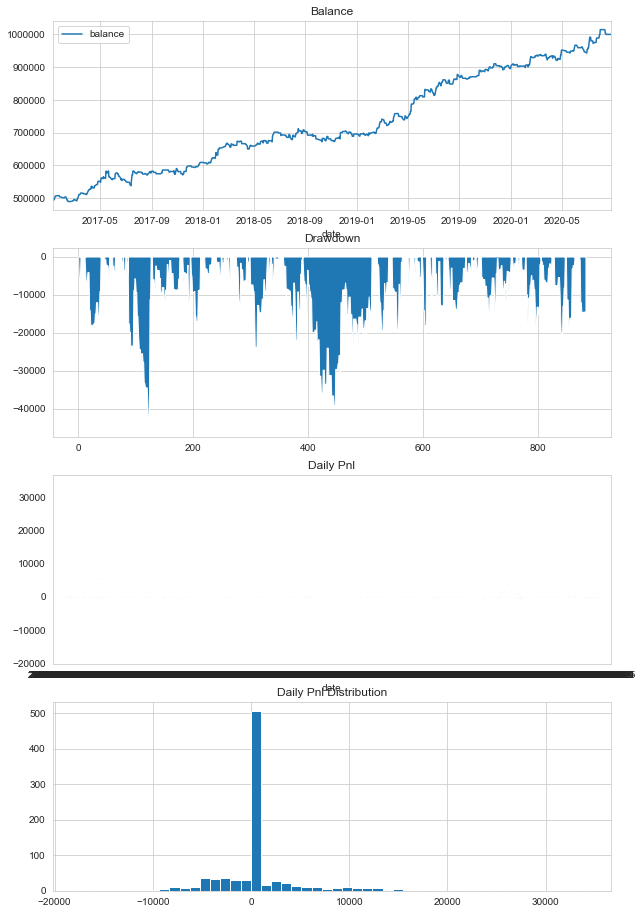

In [5]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2017, 1, 1),
    end=datetime(2020, 8, 26),
    rate=0.3/10000,
    slippage=0.6,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 5, 'atr_window': 70, 'atr_ma_len': 25, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2020-08-27 00:18:26.016269	开始加载历史数据
2020-08-27 00:18:26.296031	加载进度： [3%]
2020-08-27 00:18:27.353502	加载进度： [6%]
2020-08-27 00:18:27.636264	加载进度： [9%]
2020-08-27 00:18:27.880486	加载进度：# [12%]
2020-08-27 00:18:28.163248	加载进度：# [15%]
2020-08-27 00:18:28.442503	加载进度：# [19%]
2020-08-27 00:18:28.711748	加载进度：## [22%]
2020-08-27 00:18:29.007016	加载进度：## [25%]
2020-08-27 00:18:29.291275	加载进度：## [28%]
2020-08-27 00:18:29.508979	加载进度：### [31%]
2020-08-27 00:18:29.792236	加载进度：### [34%]
2020-08-27 00:18:30.090508	加载进度：### [37%]
2020-08-27 00:18:30.366759	加载进度：#### [40%]
2020-08-27 00:18:30.577951	加载进度：#### [43%]
2020-08-27 00:18:30.882228	加载进度：#### [46%]
2020-08-27 00:18:31.166486	加载进度：#### [50%]
2020-08-27 00:18:31.409708	加载进度：##### [53%]
2020-08-27 00:18:31.677952	加载进度：##### [56%]
2020-08-27 00:18:31.973220	加载进度：##### [59%]
2020-08-27 00:18:32.264991	加载进度：###### [62%]
2020-08-27 00:18:32.521730	加载进度：###### [65%]
2020-08-27 00:18:32.755947	加载进度：###### [68%]
2020-08-27 00:18:33.056219	加载进度：####### [7

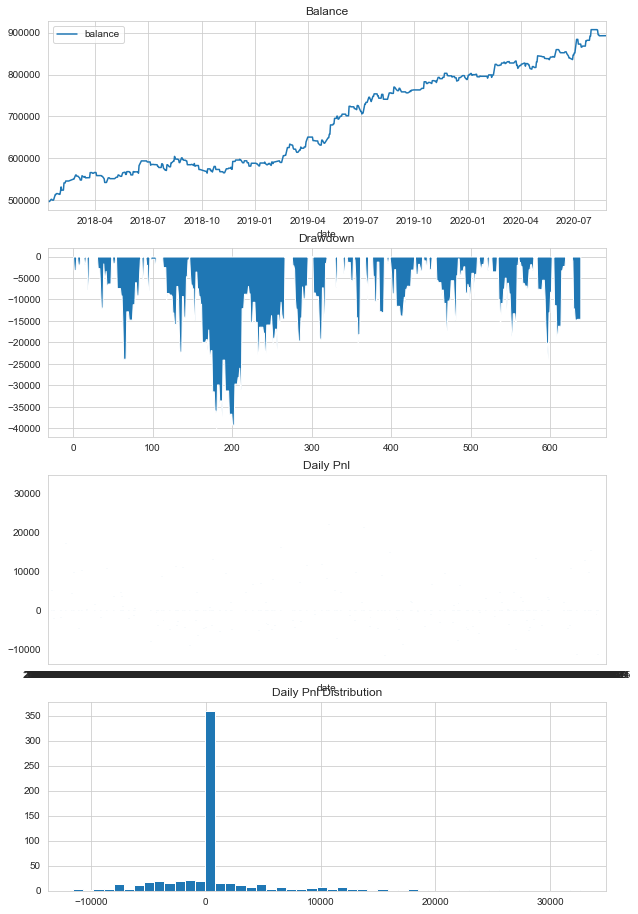

In [6]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2018, 1, 1),
    end=datetime(2020, 8, 26),
    rate=0.3/10000,
    slippage=0.6,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 5, 'atr_window': 70, 'atr_ma_len': 25, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-20 12:09:58.530770	开始加载历史数据
2019-12-20 12:09:58.530770	加载进度： [8%]
2019-12-20 12:09:58.530770	加载进度：# [16%]
2019-12-20 12:09:58.531771	加载进度：## [25%]
2019-12-20 12:09:58.531771	加载进度：### [33%]
2019-12-20 12:09:58.531771	加载进度：#### [41%]
2019-12-20 12:09:58.531771	加载进度：#### [49%]
2019-12-20 12:09:58.531771	加载进度：##### [57%]
2019-12-20 12:09:58.531771	加载进度：###### [66%]
2019-12-20 12:09:58.531771	加载进度：####### [74%]
2019-12-20 12:09:58.531771	加载进度：######## [82%]
2019-12-20 12:09:58.532773	加载进度：######### [90%]
2019-12-20 12:09:58.532773	加载进度：######### [98%]
2019-12-20 12:09:58.532773	加载进度：########## [100%]
2019-12-20 12:09:58.532773	历史数据加载完成，数据量：58560
2019-12-20 12:09:58.564276	策略初始化完成
2019-12-20 12:09:58.564276	开始回放历史数据
2019-12-20 12:10:00.743643	历史数据回放结束
2019-12-20 12:10:00.744644	开始计算逐日盯市盈亏
2019-12-20 12:10:00.748691	逐日盯市盈亏计算完成
2019-12-20 12:10:00.748691	开始计算策略统计指标
2019-12-20 12:10:00.755894	------------------------------
2019-12-20 12:10:00.755894	首个交易日：	2016-01-11
2019-12-20 12:10:00

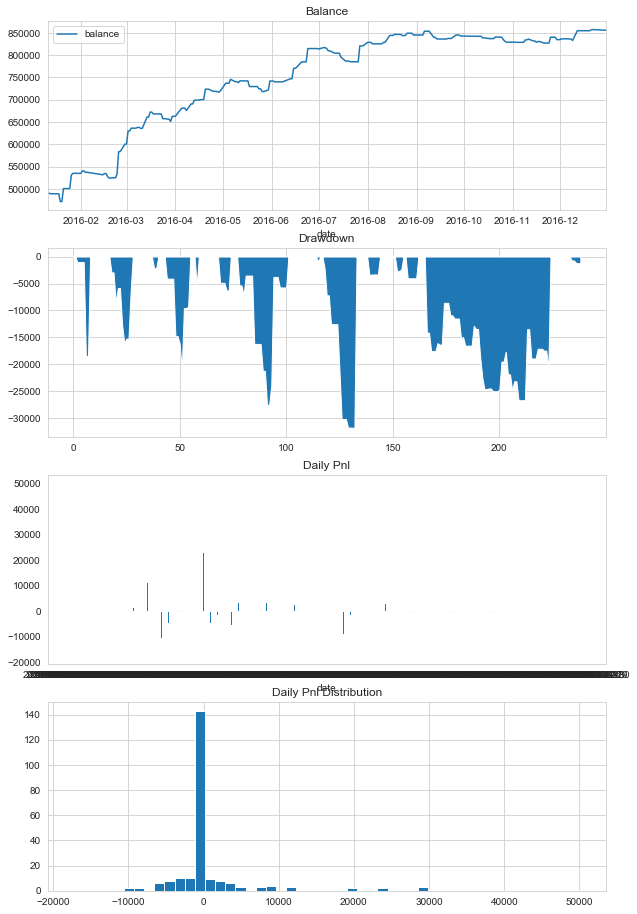

In [11]:
# 样本内每年 2016-17
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2016, 1, 1),
    end=datetime(2017, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-20 12:09:46.444700	开始加载历史数据
2019-12-20 12:09:46.444700	加载进度： [8%]
2019-12-20 12:09:46.444700	加载进度：# [16%]
2019-12-20 12:09:46.444700	加载进度：## [25%]
2019-12-20 12:09:46.444700	加载进度：### [33%]
2019-12-20 12:09:46.444700	加载进度：#### [41%]
2019-12-20 12:09:46.444700	加载进度：#### [49%]
2019-12-20 12:09:46.444700	加载进度：##### [58%]
2019-12-20 12:09:46.444700	加载进度：###### [66%]
2019-12-20 12:09:46.444700	加载进度：####### [74%]
2019-12-20 12:09:46.444700	加载进度：######## [82%]
2019-12-20 12:09:46.444700	加载进度：######### [90%]
2019-12-20 12:09:46.445701	加载进度：######### [99%]
2019-12-20 12:09:46.445701	加载进度：########## [100%]
2019-12-20 12:09:46.445701	历史数据加载完成，数据量：47520
2019-12-20 12:09:46.481240	策略初始化完成
2019-12-20 12:09:46.482241	开始回放历史数据
2019-12-20 12:09:48.210081	历史数据回放结束
2019-12-20 12:09:48.210081	开始计算逐日盯市盈亏
2019-12-20 12:09:48.225709	逐日盯市盈亏计算完成
2019-12-20 12:09:48.225709	开始计算策略统计指标
2019-12-20 12:09:48.225709	------------------------------
2019-12-20 12:09:48.225709	首个交易日：	2015-04-24
2019-12-20 12:09:48

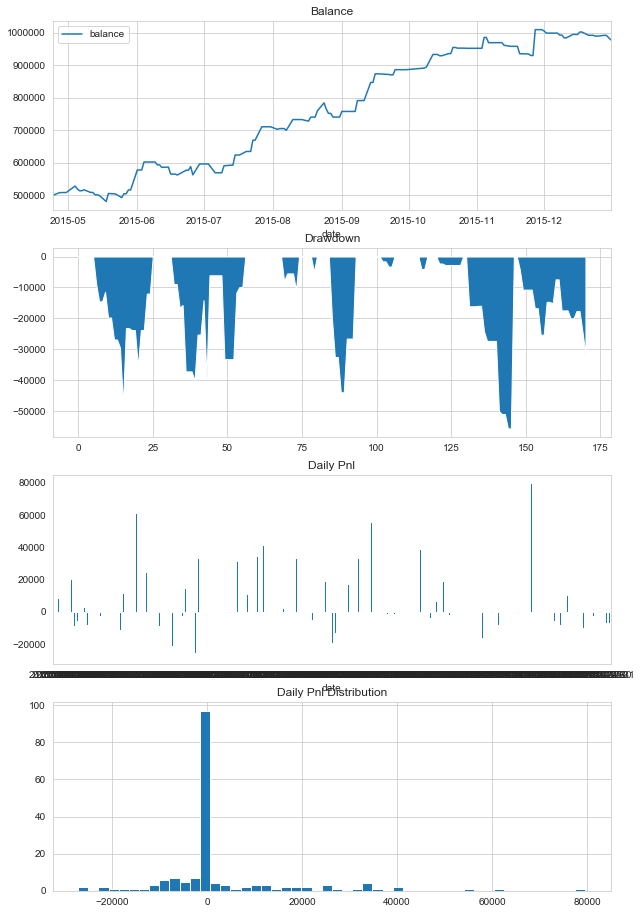

In [10]:
# 样本内每年 2015-16
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2016, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-16 14:56:11.167765	开始加载历史数据
2019-12-16 14:56:11.167765	加载进度： [2%]
2019-12-16 14:56:11.167765	加载进度： [3%]
2019-12-16 14:56:11.167765	加载进度： [5%]
2019-12-16 14:56:11.167765	加载进度： [7%]
2019-12-16 14:56:11.167765	加载进度： [8%]
2019-12-16 14:56:11.167765	加载进度： [10%]
2019-12-16 14:56:11.167765	加载进度：# [12%]
2019-12-16 14:56:11.167765	加载进度：# [13%]
2019-12-16 14:56:11.167765	加载进度：# [15%]
2019-12-16 14:56:11.167765	加载进度：# [16%]
2019-12-16 14:56:11.167765	加载进度：# [18%]
2019-12-16 14:56:11.167765	加载进度：# [20%]
2019-12-16 14:56:11.167765	加载进度：## [21%]
2019-12-16 14:56:11.167765	加载进度：## [23%]
2019-12-16 14:56:11.167765	加载进度：## [25%]
2019-12-16 14:56:11.167765	加载进度：## [26%]
2019-12-16 14:56:11.167765	加载进度：## [28%]
2019-12-16 14:56:11.167765	加载进度：## [30%]
2019-12-16 14:56:11.167765	加载进度：### [31%]
2019-12-16 14:56:11.167765	加载进度：### [33%]
2019-12-16 14:56:11.167765	加载进度：### [35%]
2019-12-16 14:56:11.167765	加载进度：### [36%]
2019-12-16 14:56:11.167765	加载进度：### [38%]
2019-12-16 14:56:11.167765	加载进度：### [39

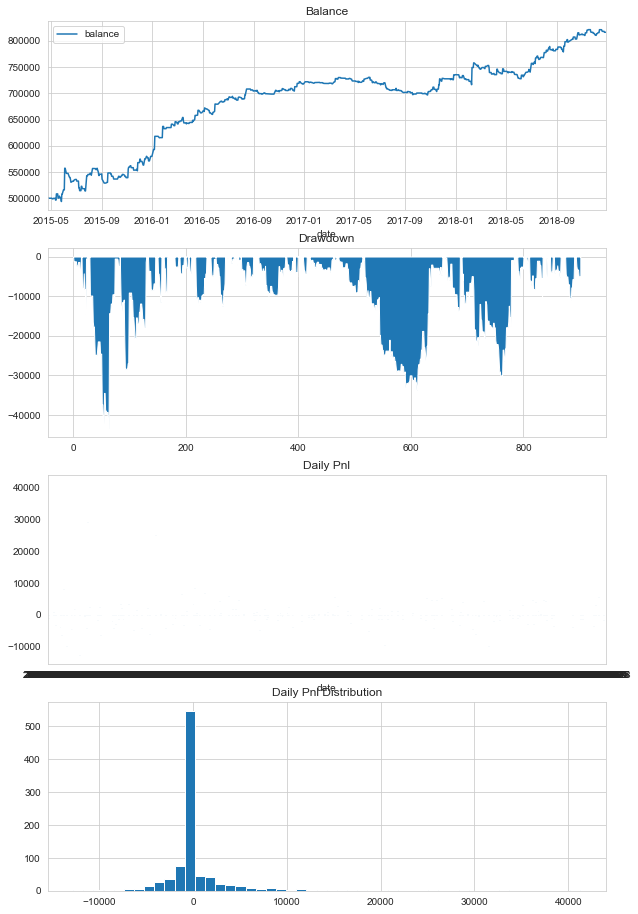

In [4]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IH9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.55,'trailing_long':0.55})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

In [6]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("atr_stop", 3, 6, 0.5) # 4
#setting.add_parameter("trailing_short", 0.3, 0.6, 0.05) # 0.4
#setting.add_parameter("trailing_long", 0.3, 0.6, 0.05) # 0.4
setting.add_parameter("atr_window", 20, 60, 4) # 44
setting.add_parameter("atr_ma_len", 16, 40, 2) # 22

engine2.run_optimization(setting)

2019-12-16 15:00:14.392390	参数：{'atr_window': 24, 'atr_ma_len': 16}, 目标：1.4352150721685117
2019-12-16 15:00:14.392390	参数：{'atr_window': 28, 'atr_ma_len': 32}, 目标：1.434102184137379
2019-12-16 15:00:14.392390	参数：{'atr_window': 28, 'atr_ma_len': 34}, 目标：1.4139702801845824
2019-12-16 15:00:14.392390	参数：{'atr_window': 60, 'atr_ma_len': 40}, 目标：1.3971258848660566
2019-12-16 15:00:14.392390	参数：{'atr_window': 56, 'atr_ma_len': 38}, 目标：1.3905074505785386
2019-12-16 15:00:14.392390	参数：{'atr_window': 60, 'atr_ma_len': 38}, 目标：1.3702499365892344
2019-12-16 15:00:14.392390	参数：{'atr_window': 48, 'atr_ma_len': 40}, 目标：1.364750902491683
2019-12-16 15:00:14.392390	参数：{'atr_window': 24, 'atr_ma_len': 38}, 目标：1.3628886023841191
2019-12-16 15:00:14.392390	参数：{'atr_window': 52, 'atr_ma_len': 38}, 目标：1.3581196744008468
2019-12-16 15:00:14.392390	参数：{'atr_window': 60, 'atr_ma_len': 36}, 目标：1.3581051774668824
2019-12-16 15:00:14.392390	参数：{'atr_window': 20, 'atr_ma_len': 18}, 目标：1.354321748458312
2019-12-16 15

[("{'atr_window': 24, 'atr_ma_len': 16}",
  1.4352150721685117,
  {'start_date': datetime.date(2015, 4, 24),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 902,
   'profit_days': 202,
   'loss_days': 207,
   'capital': 500000,
   'end_balance': 777849.7363999975,
   'max_drawdown': -43131.77880000061,
   'max_ddpercent': -7.692050223861405,
   'max_drawdown_duration': 95,
   'total_net_pnl': 277849.73639999767,
   'daily_net_pnl': 308.0374017738333,
   'total_commission': 32230.2636,
   'daily_commission': 35.73199955654102,
   'total_slippage': 85920.0,
   'daily_slippage': 95.2549889135255,
   'total_turnover': 1074342120.0,
   'daily_turnover': 1191066.6518847006,
   'total_trade_count': 1432,
   'daily_trade_count': 1.5875831485587584,
   'total_return': 55.56994727999949,
   'annual_return': 14.785795285143989,
   'daily_return': 0.04854140921686434,
   'return_std': 0.5239634759807799,
   'sharpe_ratio': 1.4352150721685117,
   'return_drawdown_ratio': 7.224334951378

2019-12-16 19:56:03.517048	开始加载历史数据
2019-12-16 19:56:03.517048	加载进度： [2%]
2019-12-16 19:56:03.517048	加载进度： [3%]
2019-12-16 19:56:03.517048	加载进度： [5%]
2019-12-16 19:56:03.518049	加载进度： [7%]
2019-12-16 19:56:03.518049	加载进度： [8%]
2019-12-16 19:56:03.518049	加载进度： [10%]
2019-12-16 19:56:03.518049	加载进度：# [12%]
2019-12-16 19:56:03.518049	加载进度：# [13%]
2019-12-16 19:56:03.518049	加载进度：# [15%]
2019-12-16 19:56:03.518049	加载进度：# [16%]
2019-12-16 19:56:03.518049	加载进度：# [18%]
2019-12-16 19:56:03.518049	加载进度：# [20%]
2019-12-16 19:56:03.518049	加载进度：## [21%]
2019-12-16 19:56:03.518049	加载进度：## [23%]
2019-12-16 19:56:03.518049	加载进度：## [25%]
2019-12-16 19:56:03.518049	加载进度：## [26%]
2019-12-16 19:56:03.518049	加载进度：## [28%]
2019-12-16 19:56:03.518049	加载进度：## [30%]
2019-12-16 19:56:03.518049	加载进度：### [31%]
2019-12-16 19:56:03.518049	加载进度：### [33%]
2019-12-16 19:56:03.518049	加载进度：### [35%]
2019-12-16 19:56:03.518049	加载进度：### [36%]
2019-12-16 19:56:03.518049	加载进度：### [38%]
2019-12-16 19:56:03.518049	加载进度：### [39

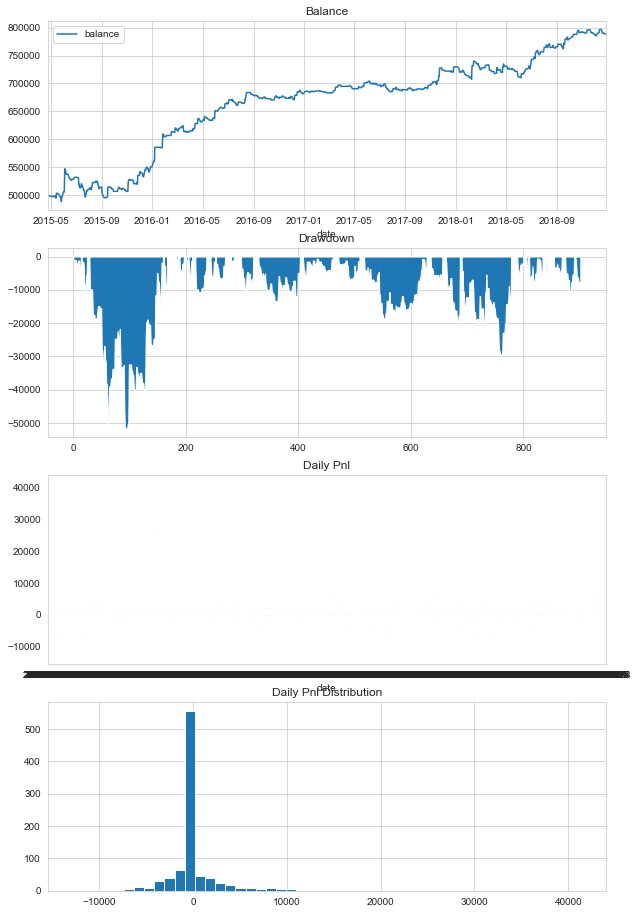

In [7]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IH9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 24, 'atr_ma_len': 16, 'trailing_short':0.55,'trailing_long':0.55})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2020-08-09 10:55:16.511563	开始加载历史数据
2020-08-09 10:55:16.511563	加载进度： [3%]
2020-08-09 10:55:16.511563	加载进度： [5%]
2020-08-09 10:55:16.511563	加载进度： [8%]
2020-08-09 10:55:16.511563	加载进度：# [11%]
2020-08-09 10:55:16.512558	加载进度：# [14%]
2020-08-09 10:55:16.512558	加载进度：# [16%]
2020-08-09 10:55:16.512558	加载进度：# [19%]
2020-08-09 10:55:16.512558	加载进度：## [22%]
2020-08-09 10:55:16.512558	加载进度：## [25%]
2020-08-09 10:55:16.512558	加载进度：## [27%]
2020-08-09 10:55:16.512558	加载进度：### [30%]
2020-08-09 10:55:16.512558	加载进度：### [33%]
2020-08-09 10:55:16.512558	加载进度：### [36%]
2020-08-09 10:55:16.513557	加载进度：### [38%]
2020-08-09 10:55:16.513557	加载进度：#### [41%]
2020-08-09 10:55:16.513557	加载进度：#### [44%]
2020-08-09 10:55:16.513557	加载进度：#### [47%]
2020-08-09 10:55:16.513557	加载进度：#### [49%]
2020-08-09 10:55:16.513557	加载进度：##### [52%]
2020-08-09 10:55:16.514714	加载进度：##### [55%]
2020-08-09 10:55:16.514714	加载进度：##### [58%]
2020-08-09 10:55:16.514714	加载进度：###### [60%]
2020-08-09 10:55:16.514714	加载进度：###### [63%]
2020-

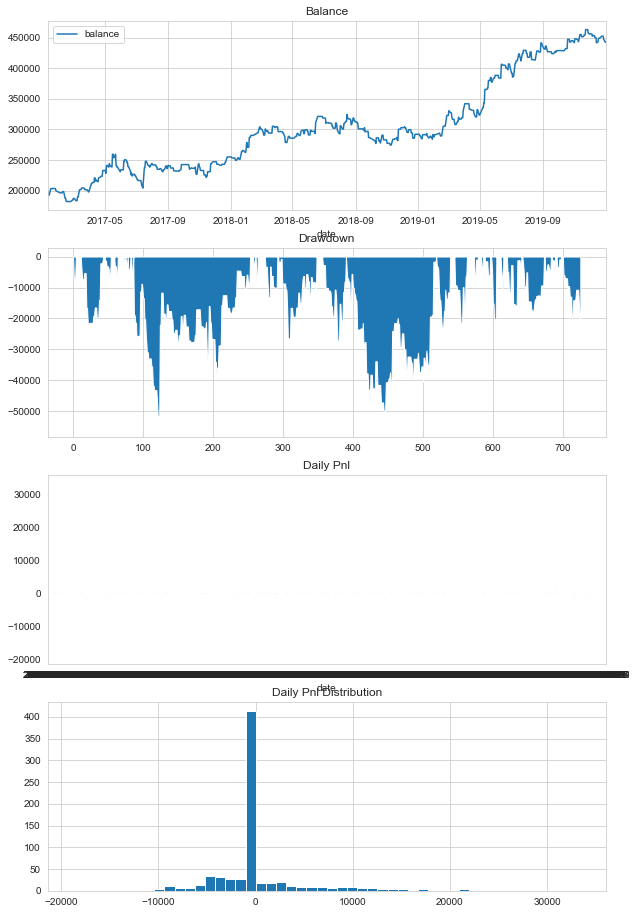

In [12]:
# 不采用锁仓
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2017, 1, 1),
    end=datetime(2020, 1, 1),
    rate=1.26/10000,
    slippage=0.8,
    size=200,
    pricetick=0.2,
    capital=200_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 5, 'atr_window': 70, 'atr_ma_len': 25, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()